Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


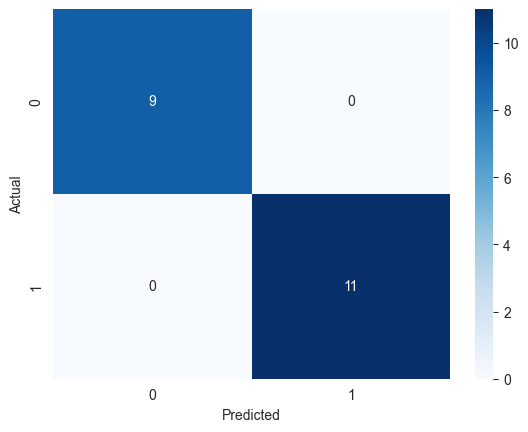

In [1]:
#Problem 2: SVM with non-linear kernels
# For this problem, recall the synthetic dataset generated in the example notebook, using make_circles(100,factor=.1, noise=.1, random_state=0)

#Part a: Design a suitable SVM classifier for this dataset. Justify your parameter choice and kernel used.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Generate the datasets using make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=0)

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Define the SVM classifier with non-linear kernel
clf = SVC(kernel='rbf', gamma=1, C=1)

#Fit the model
clf.fit(X_train, y_train)

#Predict the labels of the test set
y_pred = clf.predict(X_test)

#Print the accuracy, precision, recall, and F1 scores
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))

#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Explanation:
#We use the radial basis function (RBF) kernel, which is commonly used for non-linear classification problems. The gamma parameter determines the shape of the kernel function, with higher values of gamma leading to more complex decision boundaries. The C parameter determines the trade-off between maximizing the margin and minimizing the classification error, with larger values of C giving more weight to the classification error.

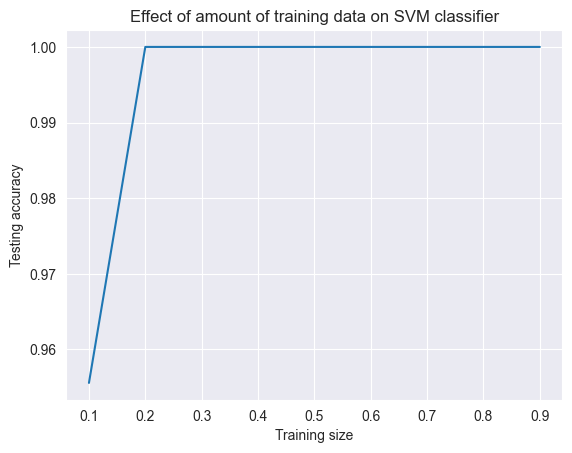

In [3]:
# Part b: Investigate the effect of the amount of training used on the classifier design. For this purpose, you can consider plotting the testing performance as a function of the amount of training used. Comment on your findings.

# Vary the amount of training data from 10% to 100% of the total data
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize an empty list to store the testing accuracy
test_scores = []

# Iterate over the different training sizes
for size in train_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=0)

    # Define the SVM classifier with RBF kernel
    clf = SVC(kernel='rbf', gamma=1, C=1)

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Predict the labels of testing data
    y_pred = clf.predict(X_test)

    # Compute the accuracy of the classifier and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    test_scores.append(accuracy)

# Plot the testing accuracy as a function of training size
plt.plot(train_sizes, test_scores)
plt.xlabel('Training size')
plt.ylabel('Testing accuracy')
plt.title('Effect of amount of training data on SVM classifier')
plt.show()

#Explanation:
# We observe that the accuracy increases as we increase the amount of training data, but beyond a certain point (around 20% of the total data), the increase in accuracy is marginal. This suggests that the SVM classifier is able to learn the underlying pattern in the data with a less amount of training data and does not require all the available data.